# Shipping Containers

* **Data:** `Stats - TEU By Year.csv`
* **Description:** Shipping container statistics, by year, from the Port of Long Beach (California).
* **Source:** https://polb.com/business/port-statistics/#yearly-teus
* **Columns of interest:**
    * `Year` is the year of the data
    * **Loaded** columns involve shipping containers that are full
    * **Empty** columns involve shipping containers are are empty
    * **Inbound** columns involve shipping containers coming into the port
    * **Outbound** columns involve shipping containers leaving the port
    * `Total Throughput` is the number of shipping containers going in and out of the port

## Read in your data

In [251]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
# import requests

In [252]:
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", '{:,}'.format)

In [253]:
pd.read_csv("Stats - TEU By Year.csv", encoding="utf-8")
df = pd.read_csv("Stats - TEU By Year.csv", encoding="utf-8")

# df = pd.read_csv("Stats - TEU By Year.csv", nrows = 2000000, encoding="utf-8")

In [254]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [255]:
df.shape

(25, 8)

In [256]:
df.dtypes

year                 int64
loaded_inbound      object
loaded_outbound     object
total_loaded        object
empties_inbound     object
empties_outbound    object
total_empties       object
total_throughput    object
dtype: object

In [257]:
# df.loaded_inbound = df.loaded_inbound.str.replace(",", "", regex=False)
df.loaded_inbound = df.loaded_inbound.str.replace(",", "").astype(float)
df.loaded_outbound = df.loaded_outbound.str.replace(",", "").astype(float)
df.total_loaded = df.total_loaded.str.replace(",", "").astype(float)
df.empties_inbound = df.empties_inbound.str.replace(",", "").astype(float)
df.empties_outbound = df.empties_outbound.str.replace(",", "").astype(float)
df.total_empties = df.total_empties.str.replace(",", "").astype(float)
df.total_throughput = df.total_throughput.str.replace(",", "").astype(float)

In [258]:
df.dtypes

year                  int64
loaded_inbound      float64
loaded_outbound     float64
total_loaded        float64
empties_inbound     float64
empties_outbound    float64
total_empties       float64
total_throughput    float64
dtype: object

In [259]:
df

,year,loaded_inbound,loaded_outbound,total_loaded,empties_inbound,empties_outbound,total_empties,total_throughput
0,2020,"3,998,340.0","1,475,888.0","5,474,227.0","146,370.0","2,492,718.0","2,639,088.0","8,113,315.0"
1,2019,"3,758,438.0","1,472,802.0","5,231,240.0","74,706.0","2,326,087.0","2,400,792.0","7,632,032.0"
2,2018,"4,097,377.0","1,523,008.0","5,620,386.0","91,364.0","2,379,274.0","2,470,638.0","8,091,023.0"
3,2017,"3,863,187.0","1,470,514.0","5,333,701.0","75,710.0","2,135,096.0","2,210,806.0","7,544,507.0"
4,2016,"3,442,575.0","1,529,497.0","4,972,073.0","99,349.0","1,703,750.0","1,803,098.0","6,775,171.0"
5,2015,"3,625,264.0","1,525,561.0","5,150,825.0","101,560.0","1,939,684.0","2,041,244.0","7,192,069.0"
6,2014,"3,517,512.0","1,604,395.0","5,121,907.0","89,184.0","1,609,716.0","1,698,900.0","6,820,807.0"
7,2013,"3,455,331.0","1,704,924.0","5,160,255.0","71,760.0","1,498,558.0","1,570,318.0","6,730,573.0"
8,2012,"3,062,301.0","1,540,179.0","4,602,479.0","82,605.0","1,360,579.0","1,443,183.0","6,045,663.0"
9,2011,"3,024,964.0","1,506,702.0","4,531,666.0","107,441.0","1,421,995.0","1,529,436.0","6,061,102.0"


## How many years of data do we have?

Also provide the first and last year

In [260]:
len(df)
# df.shape

25

In [261]:
df.sort_values(by='year', ascending=True).head(1)

,year,loaded_inbound,loaded_outbound,total_loaded,empties_inbound,empties_outbound,total_empties,total_throughput
24,1996,"1,547,578.0","1,081,722.0","2,629,299.0","179,252.0","258,618.0","437,869.0","3,067,169.0"


In [262]:
df.sort_values(by='year', ascending=True).tail(1)

,year,loaded_inbound,loaded_outbound,total_loaded,empties_inbound,empties_outbound,total_empties,total_throughput
0,2020,"3,998,340.0","1,475,888.0","5,474,227.0","146,370.0","2,492,718.0","2,639,088.0","8,113,315.0"


In [263]:
# df.year.sort_values().value_counts()

## What is the total number of shipping containers that went in and out of the port during this time period?

In [264]:
df.total_throughput.sum()

149025835.0

## Create a new column called `total_inbound` that is the number of containers entering the port

In [265]:
df['total_inbound'] = (df['empties_inbound'] + df['loaded_inbound'])
df.insert(1, "total_inbound", df['total_inbound'])

ValueError: cannot insert total_inbound, already exists

In [266]:
df.head(3)

,year,loaded_inbound,loaded_outbound,total_loaded,empties_inbound,empties_outbound,total_empties,total_throughput,total_inbound
0,2020,"3,998,340.0","1,475,888.0","5,474,227.0","146,370.0","2,492,718.0","2,639,088.0","8,113,315.0","4,144,710.0"
1,2019,"3,758,438.0","1,472,802.0","5,231,240.0","74,706.0","2,326,087.0","2,400,792.0","7,632,032.0","3,833,144.0"
2,2018,"4,097,377.0","1,523,008.0","5,620,386.0","91,364.0","2,379,274.0","2,470,638.0","8,091,023.0","4,188,741.0"


## Create a new column that is percent empty for containers entering the port

In [267]:
df['empty_inbound_pct'] = (df['empties_inbound'] / df['total_inbound']).round(3)
df.insert(1, "empty_inbound_pct", df['empty_inbound_pct'])

ValueError: cannot insert empty_inbound_pct, already exists

In [268]:
df.head(3)

,year,loaded_inbound,loaded_outbound,total_loaded,empties_inbound,empties_outbound,total_empties,total_throughput,total_inbound,empty_inbound_pct
0,2020,"3,998,340.0","1,475,888.0","5,474,227.0","146,370.0","2,492,718.0","2,639,088.0","8,113,315.0","4,144,710.0",0.035
1,2019,"3,758,438.0","1,472,802.0","5,231,240.0","74,706.0","2,326,087.0","2,400,792.0","7,632,032.0","3,833,144.0",0.019
2,2018,"4,097,377.0","1,523,008.0","5,620,386.0","91,364.0","2,379,274.0","2,470,638.0","8,091,023.0","4,188,741.0",0.022


## What year had the highest percentage of empty containers coming into port?

In [269]:
df.sort_values(by='empty_inbound_pct', ascending=False).head(3)

,year,loaded_inbound,loaded_outbound,total_loaded,empties_inbound,empties_outbound,total_empties,total_throughput,total_inbound,empty_inbound_pct
24,1996,"1,547,578.0","1,081,722.0","2,629,299.0","179,252.0","258,618.0","437,869.0","3,067,169.0","1,726,830.0",0.104
23,1997,"1,806,734.0","1,107,492.0","2,914,225.0","93,884.0","496,616.0","590,500.0","3,504,725.0","1,900,618.0",0.049
22,1998,"2,096,902.0","973,598.0","3,070,500.0","108,197.0","918,943.0","1,027,139.0","4,097,639.0","2,205,099.0",0.049


In [270]:
# df.year = pd.to_datetime(df.year)

In [271]:
# df.dtypes

## Plot the percent of empty containers coming into port over the years

<AxesSubplot:xlabel='year', ylabel='percent of empty containers'>

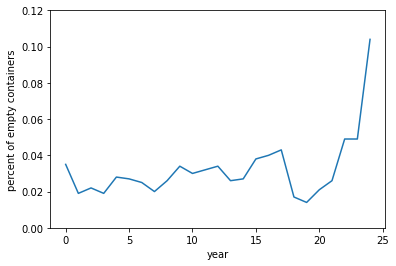

In [272]:
df.empty_inbound_pct.plot(ylim=(0,.12), xlabel='year', ylabel='percent of empty containers')

## Plot the port's total shipping container throughput over time

<AxesSubplot:xlabel='year', ylabel='shipping container throughput'>

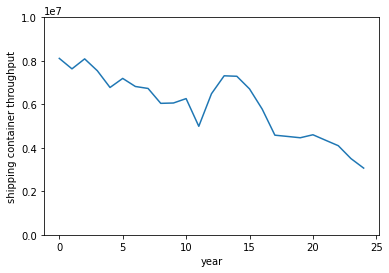

In [273]:
df.total_throughput.plot(ylim=(0,10000000), xlabel='year', ylabel='shipping container throughput')

## What year had the largest percent drop in throughput?

You calculate percentage change on a column using using `.pct_change()`.

In [287]:
df['pct_change'] = (df['total_throughput'].pct_change().round(3))
df.insert(1, "pct_change", df['pct_change'])

ValueError: cannot insert pct_change, already exists

In [288]:
df.sort_values(by='pct_change', ascending=True).head(3)

,year,loaded_inbound,loaded_outbound,total_loaded,empties_inbound,empties_outbound,total_empties,total_throughput,total_inbound,empty_inbound_pct,pct_change
17,2003,"2,370,364.0","897,145.0","3,267,509.0","107,715.0","1,206,221.0","1,313,936.0","4,581,445.0","2,478,079.0",0.043,-0.207
11,2009,"2,461,137.0","1,352,052.0","3,813,189.0","82,399.0","1,094,547.0","1,176,946.0","4,990,135.0","2,543,536.0",0.032,-0.203
23,1997,"1,806,734.0","1,107,492.0","2,914,225.0","93,884.0","496,616.0","590,500.0","3,504,725.0","1,900,618.0",0.049,-0.145


In [289]:
# df.total_throughput.pct_change().sort_values(ascending=True).head(3)

## Complete the following sentence, using the year from the last question

`Compared to the previous year, in____ there was a ____% drop in shipping container throughput.` Just type it in a comment, no need to use f-strings or anything. 

In [286]:
# Compared to the previous year, in 2003 there was a 20.7% drop in shipping container throughput.